<a href="https://colab.research.google.com/github/ereshmittal/DCGAN-s/blob/main/GAN's.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.layers import Dense, Flatten, Conv2D, UpSampling2D, MaxPooling2D, BatchNormalization, Dropout, Reshape, LeakyReLU
from tensorflow.keras.models import Sequential

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
ds = tfds.load('fashion_mnist', split='train')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteYC758I/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteYC758I/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
ds

<PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>

In [5]:
iterator = ds.as_numpy_iterator()

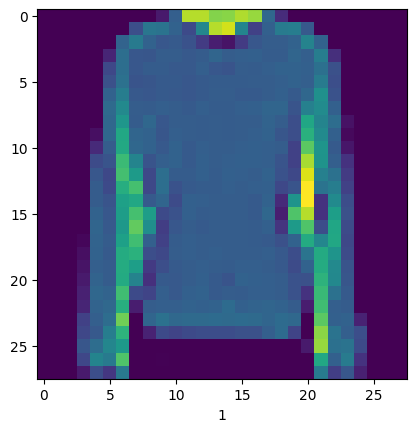

In [6]:
plt.imshow(np.squeeze(iterator.next()['image']))
plt.xlabel(iterator.next()['label'])
plt.show()

In [7]:
def scale_images(data):
  img = data['image']
  img /= 255
  return img

In [8]:
ds = ds.map(scale_images)
ds = ds.cache()
ds = ds.shuffle(60000)
ds = ds.batch(256)
ds = ds.prefetch(128)

In [27]:
np.shape(ds.as_numpy_iterator().next()[0])

(28, 28, 1)

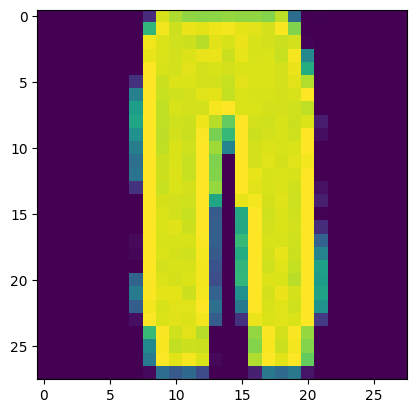

In [9]:
plt.imshow(np.squeeze(ds.as_numpy_iterator().next()[0]))

In [10]:
def build_generator():
  model = Sequential()

  model.add(Dense(7*7*128, input_dim=128))
  model.add(LeakyReLU(0.2))
  model.add(Reshape((7,7,128)))

  # upsample block1 
  model.add(UpSampling2D())
  model.add(Conv2D(256, 5, padding='same'))
  model.add(LeakyReLU(0.2))

  # upsample block2
  model.add(UpSampling2D())
  model.add(Conv2D(128, 5, padding='same'))
  model.add(LeakyReLU(0.2))

  # downsample block1
  model.add(Conv2D(64, 5, padding='same'))
  model.add(LeakyReLU(0.2))

  # downsample block2
  model.add(Conv2D(128, 3, padding='same'))
  model.add(LeakyReLU(0.2))

  # final
  model.add(Conv2D(1, 3, padding='same', activation='sigmoid'))

  return model

In [11]:
test_model = build_generator()
test_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6272)              809088    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 6272)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 256)       819456    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 256)       0         
                                                        

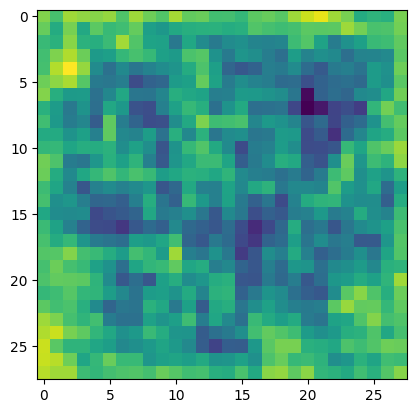

In [12]:
img = test_model(np.random.randn(4,128,1))
plt.imshow(np.squeeze(img)[0])
plt.show()

In [13]:
def build_disc():
  model = Sequential()

  model.add(Conv2D(128, 5, input_shape = (28,28,1)))
  model.add(LeakyReLU(0.1))
  model.add(Dropout(0.3))

  model.add(Conv2D(64, 5))
  model.add(LeakyReLU(0.3))
  model.add(Dropout(0.4))

  model.add(Conv2D(32, 5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.5))

  model.add(Conv2D(64, 5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  model.add(Conv2D(128, 5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.5))

  model.add(Flatten())
  model.add(Dense(256))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.5))

  model.add(Dense(1, activation='sigmoid'))

  return model 

In [14]:
discriminator = build_disc()
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 24, 24, 128)       3328      
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 24, 24, 128)       0         
                                                                 
 dropout (Dropout)           (None, 24, 24, 128)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 20, 20, 64)        204864    
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 20, 20, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 20, 20, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 32)       

In [15]:
discriminator.predict(img)

1/1 [==============================] - 0s 278ms/step


array([[0.49903128],
       [0.4990349 ],
       [0.49907628],
       [0.4989959 ]], dtype=float32)

In [16]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [17]:
g_opt = Adam(0.0001)
d_opt = Adam(0.00001)

In [18]:
g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()

In [19]:
from tensorflow.keras.models import Model

In [20]:
class FashionGAN(Model):
  def __init__(self, generator, discriminator, *args, **kwargs):
    super().__init__(*args, **kwargs)

    self.generator = generator
    self.discriminator = discriminator

  def compile(self, g_opt, d_opt, g_loss, d_loss, *args, **kwargs):
    super().compile(*args, **kwargs)

    self.g_opt = g_opt
    self.d_opt = d_opt
    self.g_loss = g_loss
    self.d_loss = d_loss

  def train_step(self, batch):
    real_images = batch
    fake_images = self.generator(tf.random.normal((256,128,1)), training=False)

    with tf.GradientTape() as d_tape:

      yhat_real = self.discriminator(real_images, training=True)
      yhat_fake = self.discriminator(fake_images, training=True)
      yhat_realfake = tf.concat([yhat_real, yhat_fake], axis=0)

      y_realfake = tf.concat([tf.zeros_like(yhat_real), tf.ones_like(yhat_fake)], axis=0)

      noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
      noise_fake = -0.15*tf.random.uniform(tf.shape(yhat_fake))
      y_realfake += tf.concat([noise_real, noise_fake], axis=0)

      total_d_loss = self.d_loss(y_realfake, yhat_realfake)
    
    d_grad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables)
    self.d_opt.apply_gradients(zip(d_grad, self.discriminator.trainable_variables))
    
    with tf.GradientTape() as g_tape:

      gen_images = self.generator(tf.random.normal((256, 128, 1)), training=True)

      predicted_labels = self.discriminator(gen_images, training=False)

      total_g_loss = self.g_loss(tf.zeros_like(predicted_labels), predicted_labels)

    g_grad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
    self.g_opt.apply_gradients(zip(g_grad, self.generator.trainable_variables))

    return {"d_loss: ":total_d_loss, "g_loss: ":total_g_loss}

In [21]:
generator = build_generator()
discriminator = build_disc()
fashgan = FashionGAN(generator, discriminator)
fashgan.compile(g_opt, d_opt, g_loss, d_loss)

In [22]:
hist = fashgan.fit(ds, epochs=20)

Epoch 1/20
235/235 [==============================] - 85s 287ms/step - d_loss: : 0.5574 - g_loss: : 0.7084
Epoch 2/20
235/235 [==============================] - 69s 292ms/step - d_loss: : 0.3453 - g_loss: : 1.8836
Epoch 3/20
235/235 [==============================] - 70s 297ms/step - d_loss: : 0.2958 - g_loss: : 2.7018
Epoch 4/20
235/235 [==============================] - 70s 299ms/step - d_loss: : 0.4100 - g_loss: : 4.2060
Epoch 5/20
235/235 [==============================] - 71s 304ms/step - d_loss: : 0.5837 - g_loss: : 1.3130
Epoch 6/20
235/235 [==============================] - 72s 305ms/step - d_loss: : 0.6484 - g_loss: : 0.5820
Epoch 7/20
235/235 [==============================] - 71s 304ms/step - d_loss: : 0.5501 - g_loss: : 0.5140
Epoch 8/20
235/235 [==============================] - 72s 308ms/step - d_loss: : 0.3927 - g_loss: : 0.4449
Epoch 9/20
235/235 [==============================] - 72s 305ms/step - d_loss: : 0.5465 - g_loss: : 0.4006
Epoch 10/20
235/235 [================

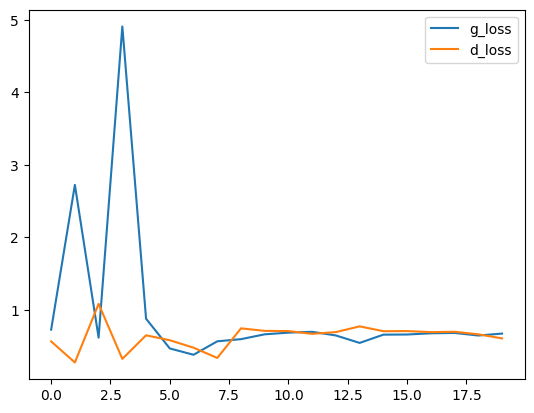

In [23]:
plt.plot(hist.history['g_loss: '], label='g_loss')
plt.plot(hist.history['d_loss: '], label='d_loss')
plt.legend()
plt.show()

In [ ]:
imgs = generator.predict(tf.random.normal((4,128,1)))
imgs

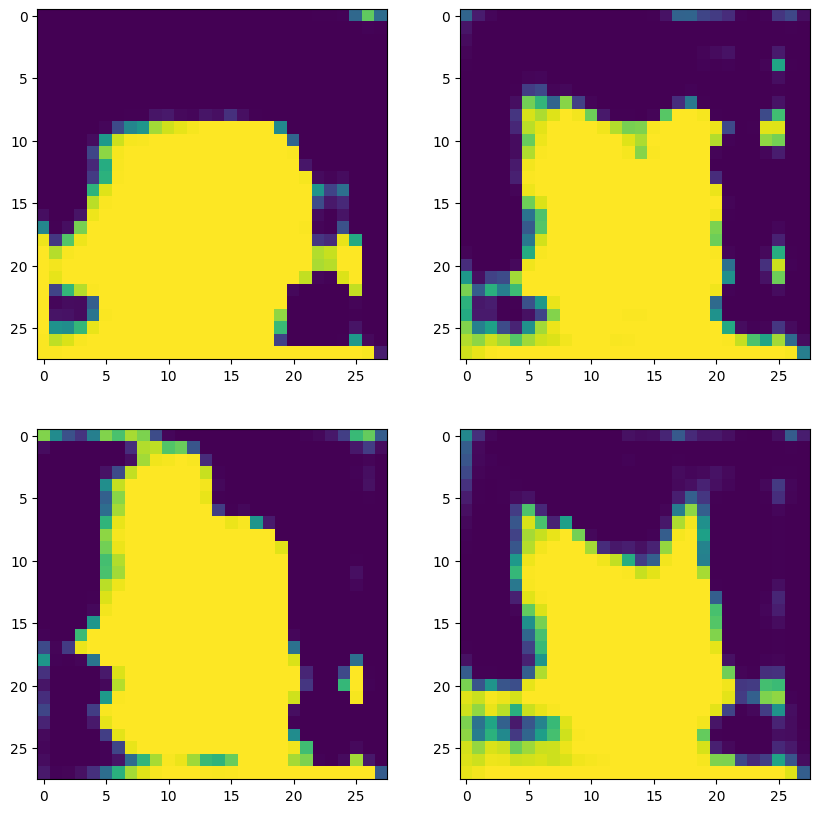

In [31]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
for r in range(4):  
   ax[int(r/2)][r%2].imshow(imgs[r])